In [1]:
!pip install datasets
!pip install transformers
!pip install torch


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 22.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 18.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 22.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 22.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.1 MB

In [2]:
from datasets import load_dataset
all_data = load_dataset("jeffnyman/emotions")
train_data = all_data["train"]

In [3]:
train_data[8]

{'text': 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'label': 1}

In [4]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

/opt/app-root/lib64/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
example_tweets = ["AI makes my life easier"]
prediction = classifier(example_tweets)
print(prediction)

[{'label': 'joy', 'score': 0.9078724384307861}]


In [6]:
#custom_text="I watched a movie yesterday. It was really good."

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
preds=classifier(example_tweets, return_all_scores = True)
labels = all_data["train"].features["label"].names
preds_df = pd.DataFrame(preds[0])


/opt/app-root/lib64/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [26]:
preds_df.score

0    0.003902
1    0.001470
2    0.002770
3    0.907872
4    0.063529
5    0.004252
6    0.016206
Name: score, dtype: float64

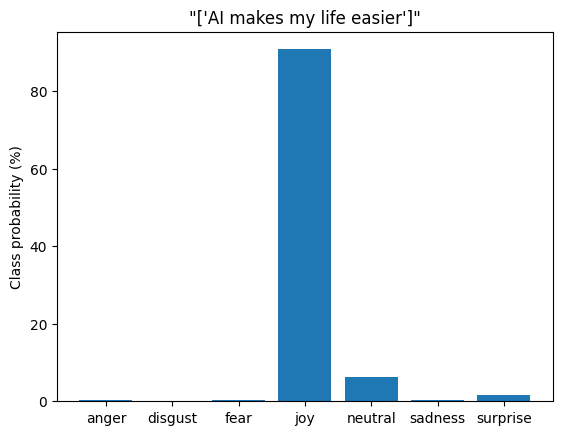

In [27]:
plt.bar(preds_df.label,100*preds_df.score)
plt.title(f'"{example_tweets}"')
plt.ylabel("Class probability (%)")
plt.show()